In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('titanic_data.csv')

In [3]:
data.shape

(891, 12)

In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
y = data.Survived
X = data.drop(['Survived','PassengerId','Name','Ticket'],axis=1)

In [6]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,22.0,1,0,7.2500,NaN,S
1,1,female,38.0,1,0,71.2833,C85,C
2,3,female,26.0,0,0,7.9250,NaN,S
3,1,female,35.0,1,0,53.1000,C123,S
4,3,male,35.0,0,0,8.0500,NaN,S


In [7]:
def clean_cabin(x):
    try:
        return x[0]
    except TypeError:
        return 'NaN'
X.Cabin = X.Cabin.apply(clean_cabin)

In [8]:
for col in X.columns:
    if isinstance(X[col][1],str):
        X[col].fillna('NaN',inplace=True)
        dummies = pd.get_dummies(X[col],prefix=col)
        X = pd.concat([X,dummies],axis=1)
        X.drop(col,axis=1,inplace=True)

In [10]:
X.shape

(891, 20)

In [11]:
X.Fare = X.Fare.apply(lambda x: np.log(x + 1))

In [12]:
from sklearn.preprocessing import MinMaxScaler

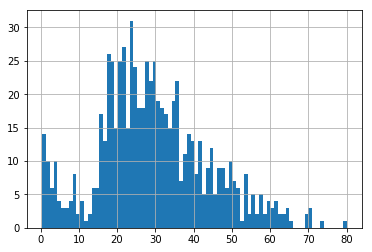

In [14]:
% matplotlib inline
X.Age.hist(bins=80);

In [15]:
X.Age=X.Age.fillna(X.Age.mean())

In [16]:
Scaler = MinMaxScaler()
Numerical = ['Pclass','Age','SibSp','Parch','Fare']
X[Numerical] = Scaler.fit_transform(X[Numerical])

In [17]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_NaN,Cabin_T,Embarked_C,Embarked_NaN,Embarked_Q,Embarked_S
0,1.0,0.271174,0.125,0.0,0.338125,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
1,0.0,0.472229,0.125,0.0,0.685892,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0
2,1.0,0.321438,0.000,0.0,0.350727,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0.0,0.434531,0.125,0.0,0.639463,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1
4,1.0,0.434531,0.000,0.0,0.352955,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1


from sklearn.preprocessing import LabelEncoder

for col in X.columns:
    if isinstance(X[col][1],str):
        le = LabelEncoder()
        le.fit(list(X[col]))
        X[col]=le.transform(list(X[col]))

In [18]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_NaN,Cabin_T,Embarked_C,Embarked_NaN,Embarked_Q,Embarked_S
0,1.0,0.271174,0.125,0.0,0.338125,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
1,0.0,0.472229,0.125,0.0,0.685892,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0
2,1.0,0.321438,0.000,0.0,0.350727,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0.0,0.434531,0.125,0.0,0.639463,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1
4,1.0,0.434531,0.000,0.0,0.352955,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1


In [19]:
from sklearn.decomposition import FastICA

In [20]:
ICA_processor = FastICA(n_components=6,random_state=1)
ICA_maker = ICA_processor.fit(X)
ICA_X = ICA_maker.transform(X)
ICA_X=pd.DataFrame(ICA_X)

In [27]:
ICA_X.head()

,0,1,2,3,4,5
0,0.011220,-0.017096,-0.000735,-0.013160,-0.021848,0.023309
1,0.005213,0.001971,0.054389,0.119822,0.007322,-0.040423
2,0.011749,-0.015048,-0.002854,-0.017276,-0.028293,-0.046867
3,0.009096,-0.007755,-0.028765,0.116525,-0.021755,-0.042212
4,0.009508,-0.010742,-0.003284,-0.014262,-0.020081,0.023656


In [22]:
from sklearn.decomposition import FactorAnalysis

In [23]:
RCA_processor = FactorAnalysis(n_components=6,random_state=1)
RCA_X = RCA_processor.fit_transform(X)
RCA_X = pd.DataFrame(RCA_X)

In [24]:
from sklearn.decomposition import PCA

In [25]:
PCA_processor = FactorAnalysis(n_components=6,random_state=1)
PCA_X = PCA_processor.fit_transform(X)
PCA_X = pd.DataFrame(PCA_X)

In [26]:
PCA_X.head()

,0,1,2,3,4,5
0,-0.841872,-0.333178,-0.085500,0.018203,-0.710234,0.111302
1,1.705907,1.331999,-1.011834,-0.154372,1.068397,-0.249857
2,1.131589,-1.069632,-0.205079,-0.107750,-1.081103,-0.609197
3,1.131589,-1.069632,-0.205079,-0.107750,1.557400,-0.448970
4,-0.841872,-0.333178,-0.085500,0.018203,-0.649573,-0.263336


In [28]:
RCA_X.head()

,0,1,2,3,4,5
0,-0.841872,-0.333178,-0.085500,0.018203,-0.710234,0.111302
1,1.705907,1.331999,-1.011834,-0.154372,1.068397,-0.249857
2,1.131589,-1.069632,-0.205079,-0.107750,-1.081103,-0.609197
3,1.131589,-1.069632,-0.205079,-0.107750,1.557400,-0.448970
4,-0.841872,-0.333178,-0.085500,0.018203,-0.649573,-0.263336


In [29]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

In [30]:
from sklearn.cluster import DBSCAN
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import SpectralClustering
from sklearn.cluster import KMeans

In [ ]:
scores = []
for n in range(2,1000,1):
    
    clusterer = KMeans(random_state=1)

    preds = clusterer.fit_predict(X)

    scores.append([silhouette_score(X,preds),n])
best_n=max(scores)
best_n

In [32]:
# TODO：在降维后的数据上使用你选择的聚类算法
clusterer = KMeans(n_clusters=best_n[1],random_state=1)
clusterer.fit(X)

# TODO：预测每一个点的簇
preds = clusterer.predict(X)

In [33]:
scores = []
for n in range(2,10,1):
    
    clusterer = DBSCAN()

    preds = clusterer.fit_predict(X)

    scores.append([silhouette_score(X,preds),n])
best_n=max(scores)
best_n

[0.54653542954539291, 9]

In [34]:
scores = []
for n in range(2,60,1):
    
    clusterer = GaussianMixture(n_components=n,random_state=1)
    clusterer.fit(X)

    preds = clusterer.predict(X)

    scores.append([silhouette_score(X,preds),n])
best_n=max(scores)
best_n

[0.61597126869980667, 16]

In [35]:
# TODO：在降维后的数据上使用你选择的聚类算法
clusterer = GaussianMixture(n_components=best_n[1],random_state=1)
clusterer.fit(X)

# TODO：预测每一个点的簇
preds = clusterer.predict(X)

In [36]:
if 'cluster' in X.columns:
    X = X.drop('cluster',axis=1)
X['cluster'] = preds
cluster_X = X
X = X.drop('cluster',axis=1)

In [37]:
cluster_X.shape

(891, 21)

In [38]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [39]:
# TODO：导入'GridSearchCV', 'make_scorer'和其他一些需要的库
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

In [44]:
parameters = {'n_estimators':[20,50,100],'learning_rate':[0.01,0.1,1]}
scores = []
for n in range(40,100,1):
    for l in [0.01,0.1,1,2]:
        scores.append([cross_val_score(AdaBoostClassifier(n_estimators=n,learning_rate=l),\
                                      ICA_X,y,cv=5,scoring='accuracy').mean(),n,l])
print('Max_Accuracy: {}'.format(max(scores)))

Max_Accuracy: [0.81594769392156219, 89, 1]


In [43]:
scores = []
for n in range(50,300,50):
    for m in range(3,12,1):
        scores.append([cross_val_score(RandomForestClassifier(n_estimators=n,random_state=l,max_depth=m),\
                                      ICA_X,y,cv=5,scoring='accuracy').mean(),n,m])
print('Max_Accuracy: {}'.format(max(scores)))

Max_Accuracy: [0.81705859343276654, 200, 3]


In [45]:
rmc = RandomForestClassifier(n_estimators=200,max_depth=3,random_state=1)
ada = AdaBoostClassifier(random_state=1,n_estimators=89,learning_rate=1)
svc = SVC(random_state=1,)
gnb = GaussianNB()

vc = VotingClassifier(estimators=[('rmc',rmc),('ada',ada)],voting = 'hard')
for x,data in zip([X,ICA_X,PCA_X,cluster_X],['X','ICA_X','PCA_X','cluster_X']):
    for clf, label in zip([rmc,ada,svc,gnb,vc],['Random Forest','AdaBoost','Support Vector Machine','Gaussian Naive Bayes','Ensembled']):
        scores = cross_val_score(clf,x,y,cv=5,scoring='accuracy')
        print('Accuracy: %0.4f(+/-%0.2f)[%s][%s]'%(scores.mean(),scores.std(),data,label))

Accuracy: 0.8058(+/-0.01)[X][Random Forest]
Accuracy: 0.8048(+/-0.02)[X][AdaBoost]
Accuracy: 0.7867(+/-0.02)[X][Support Vector Machine]
Accuracy: 0.7151(+/-0.04)[X][Gaussian Naive Bayes]
Accuracy: 0.8047(+/-0.02)[X][Ensembled]
Accuracy: 0.8160(+/-0.03)[ICA_X][Random Forest]
Accuracy: 0.8159(+/-0.03)[ICA_X][AdaBoost]
Accuracy: 0.6162(+/-0.00)[ICA_X][Support Vector Machine]
Accuracy: 0.7420(+/-0.04)[ICA_X][Gaussian Naive Bayes]
Accuracy: 0.8182(+/-0.03)[ICA_X][Ensembled]
Accuracy: 0.8013(+/-0.01)[PCA_X][Random Forest]
Accuracy: 0.7734(+/-0.02)[PCA_X][AdaBoost]
Accuracy: 0.8070(+/-0.01)[PCA_X][Support Vector Machine]
Accuracy: 0.7430(+/-0.02)[PCA_X][Gaussian Naive Bayes]
Accuracy: 0.8014(+/-0.01)[PCA_X][Ensembled]
Accuracy: 0.7856(+/-0.02)[cluster_X][Random Forest]
Accuracy: 0.8059(+/-0.03)[cluster_X][AdaBoost]
Accuracy: 0.7823(+/-0.01)[cluster_X][Support Vector Machine]
Accuracy: 0.7196(+/-0.04)[cluster_X][Gaussian Naive Bayes]
Accuracy: 0.7946(+/-0.01)[cluster_X][Ensembled]
